<a href="https://colab.research.google.com/github/jordestay/hello-world-asl/blob/main/cs5050_0_Nim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DESIGN RECURSIVE SOLUTION ALGORITHM
def win_nim(n):
  #Given n stones and the turn, is this a win for me?
  #returns True if position is a win, False otherwise
  # what are the simplest problem instances and their solutions?
  if n == 0:
    return False
  if n == 1 or n == 2:
    return True
  #identify simpler problems, solve each, construct this solution and return it
  return not win_nim(n-1) or not win_nim(n-2)

In [ ]:
[str(i) + " " + ("win" if win_nim(i) else "loss") for i in range(30)]

In [ ]:
import time
import matplotlib.pyplot as plt
import random
from scipy import stats
import numpy as np

##Calculates the time taken by function call and generates graph
def showTimeExponential(start, end, function):
  #function to be timed takes a single integer argument
  #runs the function with an input value starting at start to end
  #generates a graph of run time as a function of problem size
    timeLine = []
    values = []
    for i in range(start, end):
      start_time = time.time()
      function(i)
      elapsed = (time.time() - start_time)*1000.0
      if elapsed > 0.0:
        timeLine.append(elapsed)
        values.append(i)
    
    ##Generating the plot between time taken by each function call with n as variable and n
    plt.plot(values, timeLine, 'g')
    plt.title("Run time of recursive Nim algorithm as a function of stones in play", fontsize = 16)
    plt.xlabel("n, the number of stones in play", fontsize = 16)
    plt.yscale('log')
    plt.ylabel("time in milliseconds", fontsize = 16)
    plt.rcParams["figure.figsize"] = [16,9]
    plt.show()
    #fit an exponential function, solve for parameters, f(n) = c * a**n
    slope, intercept, _, _, _ = stats.linregress([values], [np.log(t) for t in timeLine])
    print("time = %.6f n ^ %.3f" % (np.exp(intercept), np.exp(slope)))

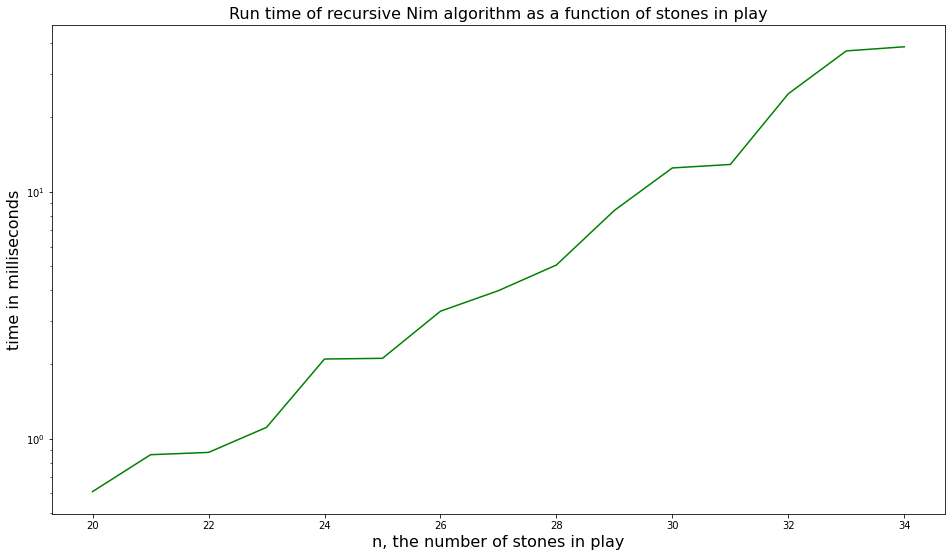

time = 0.001065 n ^ 1.363


In [ ]:
showTimeExponential(20, 35, win_nim)

In [ ]:
def win_nim_DP(n):
  # define the cache
  S=[False for i in range(n+1)]
  #fill the base cases
  S[0]=False
  S[1]=True
  S[2]=True
  # sweep through
  for i in range(n+1):
   S[i]= not S[i-1] or not S[i-2]
  return S[n+1]
  


In [ ]:
#CONVERT TO MEMORIZING
#use a dictionary to remember each problem's solution as it is solved
S = {}

In [ ]:
def win_nim_m(n):
  global S
  #returns True if position is a win, False otherwise
  #same recursive code for base cases
  if n == 0:
    return False
  if n == 1 or n == 2:
    return True
  #Have we seen this problem before? If so return its solution
  if n in S:
    return S[n]
  #Edit the recursive code to store solution in cache and return from cache
  S[n] =  not win_nim_m(n-1) or not win_nim_m(n-2)
  return S[n]


NameError: ignored

In [ ]:
import datetime
times = []

for i in range(1,30):
  start_time = datetime.datetime.now()
  # your script
  win_nim(i)
  time_diff = (datetime.datetime.now() - start_time).total_seconds() * 1000
  times.append(time_diff)
  if i > 2:
    print("%3d %5.2f  %5.2f" % (i, time_diff, times[-1]/times[-2]))